In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [11]:
fake_data = pd.read_csv('Fake.csv', encoding='ISO-8859-1')
true_data = pd.read_csv('True.csv', encoding='ISO-8859-1')


In [12]:
# Add labels to the datasets
fake_data['label'] = 1  # 1 for fake news
true_data['label'] = 0  # 0 for real news

# Combine the datasets
data = pd.concat([fake_data, true_data])

# Shuffle the data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 1: Preprocess the data (optional)
# Depending on your specific dataset, you might need to perform additional preprocessing steps.

# Step 2: Split the data into training and testing sets
X = data['text']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)





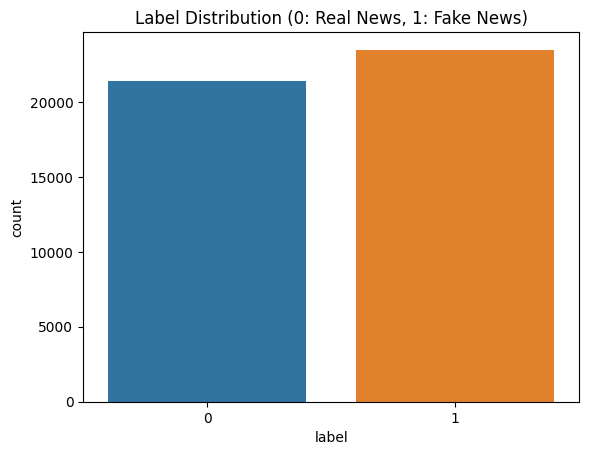

In [17]:
sns.countplot(x='label', data=data)
plt.title('Label Distribution (0: Real News, 1: Fake News)')
plt.show()

In [15]:
# Step 3: Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)



In [16]:
# Step 4: Train a classifier (SVM in this case)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)



SVC(kernel='linear')

In [18]:
# Step 5: Evaluate the model
y_pred = svm_classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [19]:
print(f'Accuracy: {accuracy}')
print(report)


Accuracy: 0.9942093541202672
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4270
           1       1.00      0.99      0.99      4710

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



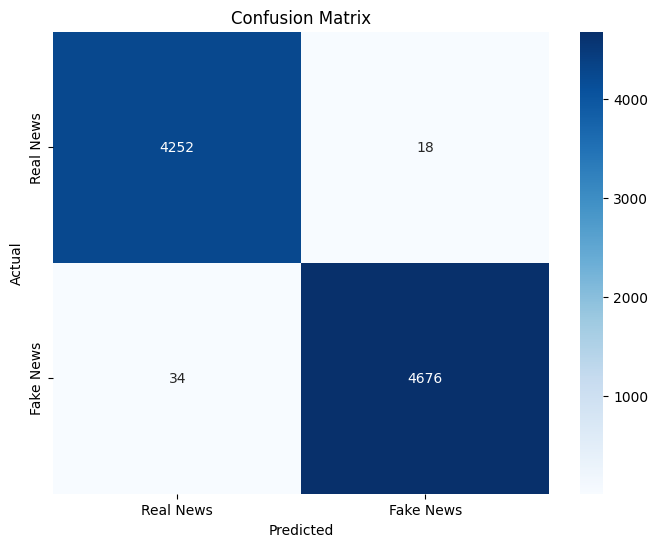

In [20]:
# Add Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Real News', 'Fake News'],
            yticklabels=['Real News', 'Fake News'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

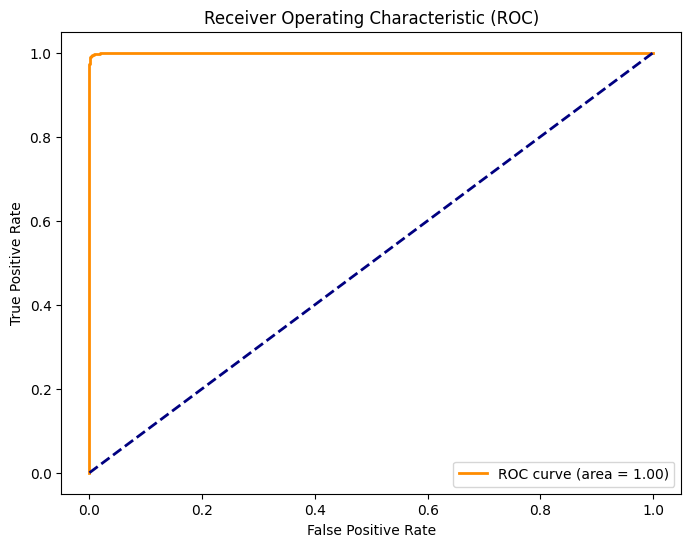

In [21]:
# Add ROC Curve
y_scores = svm_classifier.decision_function(X_test_tfidf)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()